<a href="https://colab.research.google.com/github/vs1991/LoanEligibility-Classfication-Problem/blob/main/LoanEligibility_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [3]:
drive.mount('../Greyatom',force_remount=True)

Mounted at ../Greyatom


In [4]:
cd ../Greyatom/'My Drive'/'Data Science'/'Loan'

/Greyatom/My Drive/Data Science/Loan


In [5]:
ls

sample_submission_49d68Cx.csv  test_lAUu6dG.csv  train_ctrUa4K.csv


In [6]:
import pandas as pd
import numpy as np 

#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.0)

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [7]:
data_raw=pd.read_csv('train_ctrUa4K.csv')

data_val=pd.read_csv('test_lAUu6dG.csv')

In [8]:
data1=data_raw.copy(deep=True)


In [9]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
print('Shape of Traning dataset:',data_raw.shape)
print('*'*60)
print('Shape of Unseen dataset :',data_val.shape)

Shape of Traning dataset: (614, 13)
************************************************************
Shape of Unseen dataset : (367, 12)


In [11]:
print(data_raw.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [12]:
print(data_raw.info())
print('*'*60)
print(data_raw.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [13]:
print('for Training dataset')
print('\n')
for i in data_raw.columns.values:
  print(i,':',(data_raw[i].isnull().sum()/891)*100,'*'*5,data_raw[i].isnull().sum())



print('*'*60)
print('\n')
print('for Testing dataset')
print('\n')

for i in data_val.columns.values:
  print(i,':',(data_val[i].isnull().sum()/891)*100,'*'*5,data_val[i].isnull().sum())

for Training dataset


Loan_ID : 0.0 ***** 0
Gender : 1.4590347923681257 ***** 13
Married : 0.33670033670033667 ***** 3
Dependents : 1.6835016835016834 ***** 15
Education : 0.0 ***** 0
Self_Employed : 3.5914702581369253 ***** 32
ApplicantIncome : 0.0 ***** 0
CoapplicantIncome : 0.0 ***** 0
LoanAmount : 2.4691358024691357 ***** 22
Loan_Amount_Term : 1.5712682379349048 ***** 14
Credit_History : 5.611672278338945 ***** 50
Property_Area : 0.0 ***** 0
Loan_Status : 0.0 ***** 0
************************************************************


for Testing dataset


Loan_ID : 0.0 ***** 0
Gender : 1.2345679012345678 ***** 11
Married : 0.0 ***** 0
Dependents : 1.122334455667789 ***** 10
Education : 0.0 ***** 0
Self_Employed : 2.581369248035915 ***** 23
ApplicantIncome : 0.0 ***** 0
CoapplicantIncome : 0.0 ***** 0
LoanAmount : 0.5611672278338945 ***** 5
Loan_Amount_Term : 0.6734006734006733 ***** 6
Credit_History : 3.254769921436588 ***** 29
Property_Area : 0.0 ***** 0


In [14]:
data1['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("ApplicantIncome", "CoapplicantIncome", "LoanAmount",'Loan_Amount_Term','Credit_History'))

fig.add_trace(go.Histogram(x=data1['ApplicantIncome']),
              row=1, col=1)
fig.add_trace(go.Histogram(x=data1['CoapplicantIncome']),
              row=1, col=2)
fig.add_trace(go.Histogram(x=data1['LoanAmount']),
              row=2, col=1)
fig.add_trace(go.Histogram(x=data1['Loan_Amount_Term']),
              row=2, col=2)
fig.add_trace(go.Histogram(x=data1['Credit_History']),
              row=3, col=1)


fig.update_layout(height=1000, width=1100,
                  title_text="Unvariate Analyis of Categorical Features")

fig.show()

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("Gender", "Married", "Dependents", 'Education','Self_Employed','Property_Area','Loan_Status'))

fig.add_trace(go.Bar(y=data1['Gender'].value_counts().values, x=data1['Gender'].value_counts().index),
              row=1, col=1)

fig.add_trace(go.Bar(y=data1['Married'].value_counts().values, x=data1['Married'].value_counts().index),
              row=1, col=2)

fig.add_trace(go.Bar(y=data1['Dependents'].value_counts().values, x=data1['Dependents'].value_counts().index),
              row=1, col=3)

fig.add_trace(go.Bar(y=data1['Education'].value_counts().values, x=data1['Education'].value_counts().index),
              row=2, col=1)

fig.add_trace(go.Bar(y=data1['Self_Employed'].value_counts().values, x=data1['Self_Employed'].value_counts().index),
              row=2, col=2)

fig.add_trace(go.Bar(y=data1['Property_Area'].value_counts().values, x=data1['Property_Area'].value_counts().index),
              row=2, col=3)

fig.add_trace(go.Bar(y=data1['Loan_Status'].value_counts().values, x=data1['Loan_Status'].value_counts().index),
              row=3, col=1)

fig.update_layout(height=1000, width=1100,
                  title_text="Unvariate Analyis of Categorical Features")

fig.show()

In [17]:
#data1.groupby(['Loan_Status','Gender'],as_index='False')['Loan_Status'].count().to_frame()
#data1.groupby(['Loan_Status','Gender'],as_index='False')['Loan_Status'].count().to_frame()
#data1.groupby(['Loan_Status','Dependents'],as_index='False')['Loan_Status'].count().to_frame()
#data1.groupby(['Loan_Status','Education'],as_index='False')['Loan_Status'].count().to_frame()
#data1.groupby(['Loan_Status','Self_Employed'],as_index='False')['Loan_Status'].count().to_frame()
#data1.groupby(['Loan_Status','Property_Area'],as_index='False')['Loan_Status'].count().to_frame()

In [18]:
#sns.catplot(data=data1, x='Loan_Status', y='ApplicantIncome',hue='Education',kind='violin',split=True)


In [19]:
#sns.catplot(data=data1, x='Loan_Status', y='ApplicantIncome',hue='Self_Employed')


**Hypothesis**

Let us make some assumptions and confirm those assumptions by visualizing the data(bivariate analysis)



1.   Applicants with high income have more chance for loan approval
2.   Applicants who have repaid there loans have more chance of loan approval
3.   Loan approval may depend on the loan amount.If the loan amount is less we can say that chances of approval is high
4.   Lesser the amount to be paid montly,higher chances of loan approval



# Bivariate Analysis 1

between categorical Features and Loan Status

In [20]:
Credit_History=(pd.crosstab(data1['Credit_History'],data1['Loan_Status']))
Credit_History=Credit_History.div(Credit_History.sum(1).astype(float), axis=0)


import plotly.express as px
fig=px.bar(y=Credit_History.stack().reset_index().rename(columns={0:'Sum'})['Credit_History'],
            x=Credit_History.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Credit_History.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Credit_History Vs Loan Status")




In [21]:
Property_Area=(pd.crosstab(data1['Property_Area'],data1['Loan_Status']))
Property_Area=Property_Area.div(Property_Area.sum(1).astype(float), axis=0)


import plotly.express as px
fig=px.bar(y=Property_Area.stack().reset_index().rename(columns={0:'Sum'})['Property_Area'],
            x=Property_Area.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Property_Area.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Property_Area Vs Loan Status")




In [22]:
data1['Dependents']=data1['Dependents'].replace({'3+':3})
Dependents=(pd.crosstab(data1['Dependents'],data1['Loan_Status']))
Dependents=Dependents.div(Dependents.sum(1).astype(float), axis=0)
Dependents

Loan_Status,N,Y
Dependents,,
3,0.352941,0.647059
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475


In [23]:
import plotly.express as px
fig=px.bar(y=Dependents.stack().reset_index().rename(columns={0:'Sum'})['Dependents'],
            x=Dependents.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Dependents.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Dependents Vs Loan Status")




In [24]:
Gender=(pd.crosstab(data1['Gender'],data1['Loan_Status']))
Gender=Gender.div(Gender.sum(1).astype(float), axis=0)
Gender


Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [25]:
import plotly.express as px
fig=px.bar(y=Gender.stack().reset_index().rename(columns={0:'Sum'})['Gender'],
            x=Gender.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Gender.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Gender Vs Loan Status")




In [26]:
Education=(pd.crosstab(data1['Education'],data1['Loan_Status']))
Education=Education.div(Education.sum(1).astype(float), axis=0)


import plotly.express as px
fig=px.bar(y=Education.stack().reset_index().rename(columns={0:'Sum'})['Education'],
            x=Education.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Education.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Education Vs Loan Status")




In [27]:
Self_Employed=(pd.crosstab(data1['Self_Employed'],data1['Loan_Status']))
Self_Employed=Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0)

fig=px.bar(y=Self_Employed.stack().reset_index().rename(columns={0:'Sum'})['Self_Employed'],
            x=Self_Employed.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Self_Employed.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Self_Employed Vs Loan Status")



In [28]:
Married=(pd.crosstab(data1['Married'],data1['Loan_Status']))
Married=Self_Employed.div(Married.sum(1).astype(float), axis=0)

fig=px.bar(y=Married.stack().reset_index().rename(columns={0:'Sum'})['Self_Employed'],
            x=Married.stack().reset_index().rename(columns={0:'Sum'})['Sum'],
            color=Married.stack().reset_index().rename(columns={0:'Sum'})['Loan_Status'],orientation='h',
           barmode='group')
fig.update_layout(height=500, width=710,
                 title_text="Married Vs Loan Status")



**Observations**


1.   Male and femal approval/Not approval rate is almost same 
2.   Distribution of applicants with 1 or 3 is similar across both the categories of Loan Status
3.   Nothing much usefull can be inferred from self employed vs loan status 
4.   People with a credit history is more likely to get there loan approved
5.   people from semi-urban areas have higher chance of getting there loans approved
 



In [29]:
#fig = px.strip(data1, x='Loan_Status', y='ApplicantIncome',color='Self_Employed')#,facet_col="Property_Area")
#fig.show()
#data1[['Loan_Status','Gender']].groupby(['Gender'],as_index='False').count()
#data1[['Loan_Status','Gender']].groupby(['Gender']).sum()
#sns.catplot(data=data1, x="Gender", y="Loan_Status")#, color='Married')
#sns.histplot(data1['LoanAmount'])
#data1['Gender']=data1['Gender'].replace({'Male':1,'Female':0})
#data1['Married']=data1['Married'].replace({'Yes':1,'No':0})
#data1['Education']=data1['Education'].replace({'Graduate':1,'Not Graduate':0})
#data1['Self_Employed']=data1['Self_Employed'].replace({'Yes':1,'No':0})
#data1['Loan_Status']=data1['Loan_Status'].replace({'Y':1,'N':0})
#data1[['Gender','Loan_Status']].groupby(['Gender'],as_index=False).mean()
#data1[['Married','Loan_Status']].groupby(['Married'],as_index=False).mean()
#data1[['Education','Loan_Status']].groupby(['Education'],as_index=False).mean()
#data1[['Self_Employed','Loan_Status']].groupby(['Self_Employed'],as_index=False).mean()
#data1['Self_Employed'].value_counts()
#sns.barplot(y=data1['Loan_Status'],x=data1['Self_Employed'])




# Bivariate analysis 2
Continuous Feature and Loan Status

In [30]:
app_income=data1.groupby('Loan_Status')['ApplicantIncome'].mean()
app_income=app_income.reset_index()
app_income

,Loan_Status,ApplicantIncome
0,N,5446.078125
1,Y,5384.068720


In [31]:
px.bar(x=app_income['Loan_Status'],y=app_income['ApplicantIncome'])

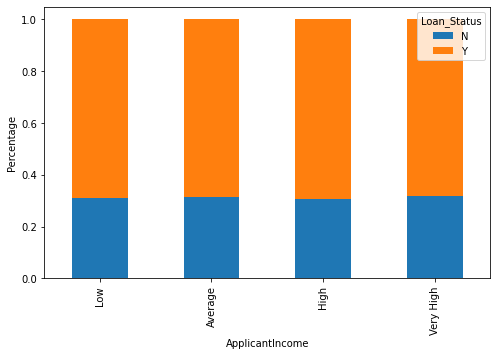

In [34]:
bins=[0,2877,3812,5795,81000]
group=['Low','Average','High','Very High']
data1['Applicant_Income_bin']=pd.cut(data1['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data1['Applicant_Income_bin'],data1['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

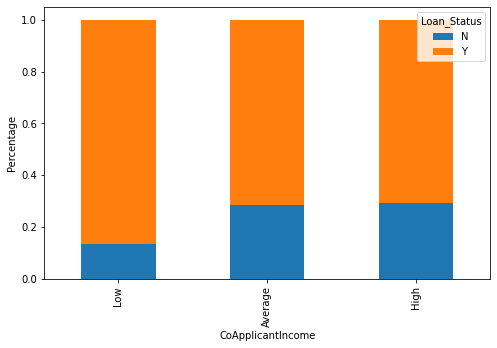

In [35]:
bins=[0,1000,2000,42000]
group=['Low','Average','High']
data1['Co-applicant-Income_bin']=pd.cut(data1['CoapplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data1['Co-applicant-Income_bin'],data1['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoApplicantIncome')
P=plt.ylabel('Percentage')

**Observations**


1.   *Applicant_Income*=It can be seen that applicant's income does not effect the chances of loan approval which contradicts our hypothesis
2.   *Co-Applicant_Income*= it can be seen people with low income have high approval rate,which is not right.this maybe because we have a lot applicants who do not have co-applicants hence there value is zero.
3. So we make a new variable adding bot applicants and co-applicants income 



In [36]:
data1['TotalIncome']=data1['ApplicantIncome'] + data1['CoapplicantIncome']


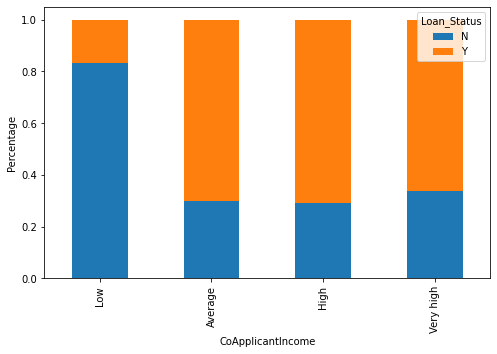

In [37]:
bins=[0,2000,4000,6000,8000]
group=['Low','Average','High','Very high']
data1['Total_Income_bin']=pd.cut(data1['TotalIncome'],bins,labels=group)
Total_Income_bin=pd.crosstab(data1['Total_Income_bin'],data1['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoApplicantIncome')
P=plt.ylabel('Percentage')

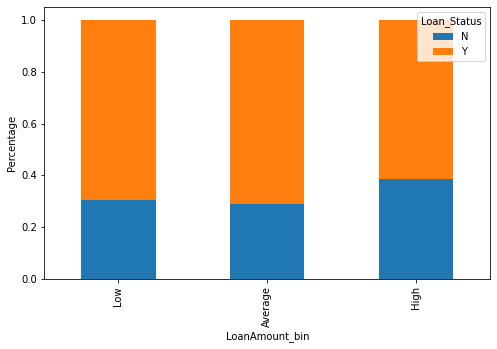

In [38]:
bins=[0,100,200,700]
group=['Low','Average','High']
data1['LoanAmount_bin']=pd.cut(data1['LoanAmount'],bins,labels=group)
Loan_Amount=pd.crosstab(data1['LoanAmount_bin'],data1['Loan_Status'])
Loan_Amount.div(Loan_Amount.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount_bin')
P=plt.ylabel('Percentage')

**Observations**


1.   Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.
2.    proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.




## **Data Wrangling**


1.   Since for some models we require the categorical values to be numerical i.e (1,2..).Converting features into numerical values
2.   After converting checking the cor-relation
3.   Imputing the missing values since some models do not handle missing val






In [39]:
#dropping the bins from the dataset
data1=data1.drop(['Applicant_Income_bin','Co-applicant-Income_bin','Total_Income_bin','LoanAmount_bin','TotalIncome'],axis=1)


In [40]:
data_val['Dependents'].replace('3+',3,inplace=True)
data1['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

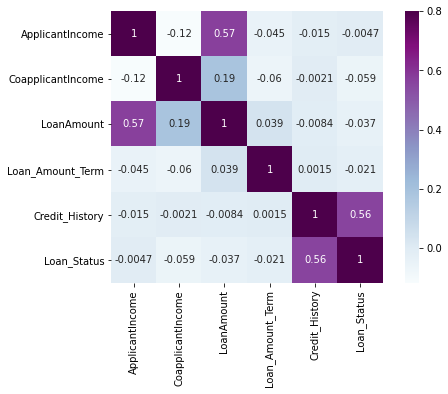

In [41]:
matrix=data1.corr()
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu',annot=True)

***Observations***
Most correlated is applicant income and Loan Amount 

there is some correlation between loan-Amount and co-applicant income 